# Linear Regression Example

In [1]:
import sys
sys.path.append('../../pyLearnAlgorithms')
from pyLearnAlgorithms.load_data import LoadData
from pyLearnAlgorithms.graph_view import GraphView
from pyLearnAlgorithms.linear_regression import LinearRegression
from pyLearnAlgorithms.split_data import SplitData
import numpy as np

In [2]:
dataset = LoadData('../tests/datasets', 'ComponentsAnalysis.txt')
data = dataset.load_txt()

In [3]:
split = SplitData(data)
data_train, data_test, data_val = split.split_train_test_val(0.2, 0.2)
print(data_train.size)
print(data_test.size)
print(data_val.size)

118
38
38


In [4]:
data_train = dataset.convert_numpy_array(data_train)
data_test = dataset.convert_numpy_array(data_test)
data_val = dataset.convert_numpy_array(data_val)
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

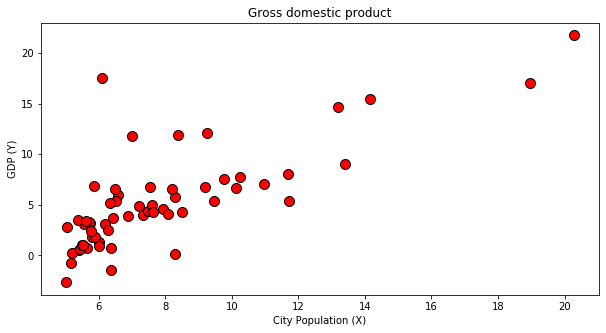

In [5]:
dataset_graph = GraphView(X, y)
dataset_graph.view_data('City Population (X)', 'GDP (Y)', 'Gross domestic product')

In [6]:
regressor = LinearRegression(X, y)
optimize_values = regressor.trainLinearReg()
print(optimize_values.fun)
print(optimize_values.x)

4.759514395320716
[-4.10728579  1.19429681]


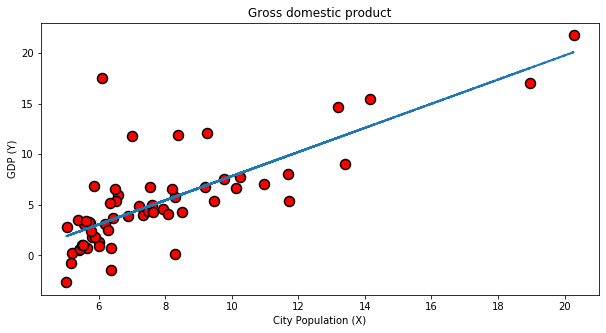

In [7]:
dataset_graph.model_linear('City Population (X)', 'GDP (Y)', 'Gross domestic product')

In [8]:
train_error, val_error = regressor.learningCurve(Xval, yval)
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			0.0	7.284111485027083
2			4.3196570326068455e-15	14.981744380445841
3			0.806510693543329	8.158354459616621
4			0.8850511656231291	7.346689115426374
5			17.930835514504153	9.264076599981353
6			15.635136189785332	9.469665906583412
7			14.850720916038457	11.147285979278157
8			14.98279258123431	7.940465665651219
9			13.856904997535437	6.869086020959161
10			13.240379292903036	6.126611724216382
11			12.568224417026032	5.826985234234128
12			11.837738443348629	5.751595569659106
13			10.928543790607286	5.7540752368043036
14			11.83634048308361	5.896766550094602
15			12.181149452330034	5.727771300727385
16			11.422552340954383	5.723680749385644
17			10.823964260478512	5.736339273731529
18			10.260161975945566	5.757621774667592
19			9.74011575109127	5.749197406666994
20			9.305190587183242	5.790058759891375
21			8.862151046855296	5.789379101796687
22			8.481761135203634	5.797983182393875
23			8.234649910229914	5.806001476758045
2

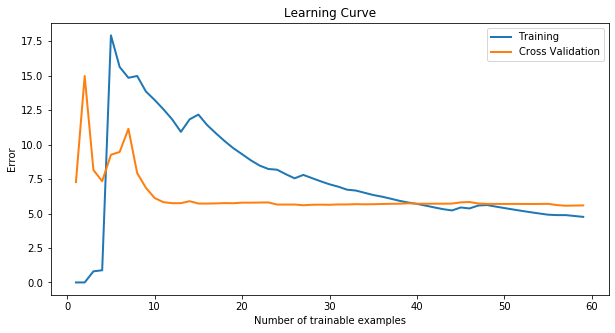

In [9]:
dataset_graph.learning_curve(train_error, val_error)

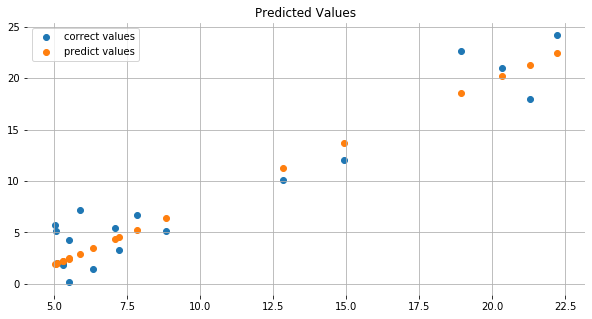

In [10]:
pred = regressor.predict(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred)

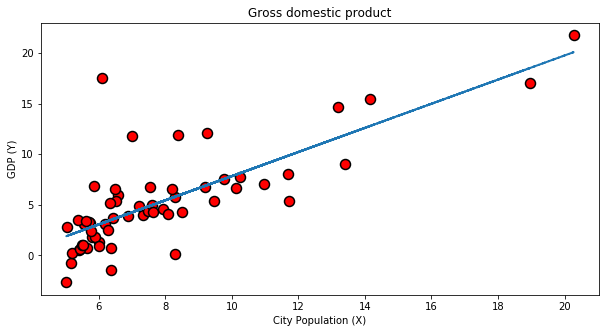

In [11]:
dataset_graph.model_linear_normal_equation('City Population (X)', 'GDP (Y)', 'Gross domestic product')

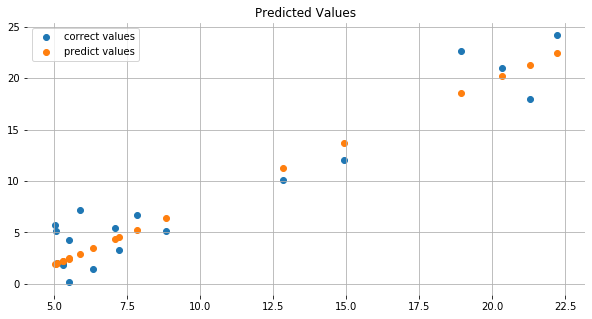

In [12]:
pred_NE = regressor.predict_normal_equation(Xtest)
dataset_graph.predicted_values(Xtest, ytest, pred_NE)